In [1]:
import numpy as np 
import os 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn import preprocessing 


In [2]:
df=pd.read_csv('BitcoinHeistData.csv',delimiter=',')
df.dataframeName='BitcoinHeistData.csv'
df.shape

(2916697, 10)

In [3]:
df.head(10)

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,8.333333e-03,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,2.441406e-04,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000e+00,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,3.906250e-03,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,7.284841e-02,456,0,1,200000000.0,princetonLocky
5,112AmFATxzhuSpvtz1hfpa3Zrw3BG276pc,2016,96,144,8.461400e-02,2821,0,1,50000000.0,princetonLocky
6,112E91jxS2qrQY1z78LPWUWrLVFGqbYPQ1,2016,225,142,2.088519e-03,881,0,2,100000000.0,princetonCerber
7,112eFykaD53KEkKeYW9KW8eWebZYSbt2f5,2016,324,78,3.906250e-03,1,0,2,100990000.0,princetonCerber
8,112FTiRdJjMrNgEtd4fvdoq3TC33Ah5Dep,2016,298,144,2.302828e+00,4220,0,2,80000000.0,princetonCerber
9,112GocBgFSnaote6krx828qaockFraD8mp,2016,62,112,3.725290e-09,1,0,1,50000000.0,princetonLocky


In [11]:
df.describe()

,address,year,day,length,weight,count,looped,neighbors,income,label
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,1.309088e+06,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09,2.786413e+01
std,7.568217e+05,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11,1.619233e+00
min,0.000000e+00,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07,0.000000e+00
25%,6.540070e+05,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07,2.800000e+01
50%,1.308551e+06,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08,2.800000e+01
75%,1.963599e+06,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08,2.800000e+01
max,2.631094e+06,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13,2.800000e+01


In [12]:
df.isnull().sum()

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

In [4]:
label_encoder = preprocessing.LabelEncoder() 
df['label']= label_encoder.fit_transform(df['label']) 
df['address']=label_encoder.fit_transform(df['address'])
print(df.head(10))

   address  year  day  length        weight  count  looped  neighbors  \
0       23  2017   11      18  8.333333e-03      1       0          2   
1      128  2016  132      44  2.441406e-04      1       0          1   
2      169  2016  246       0  1.000000e+00      1       0          2   
3      217  2016  322      72  3.906250e-03      1       0          2   
4      293  2016  238     144  7.284841e-02    456       0          1   
5      335  2016   96     144  8.461400e-02   2821       0          1   
6      437  2016  225     142  2.088519e-03    881       0          2   
7     1194  2016  324      78  3.906250e-03      1       0          2   
8      477  2016  298     144  2.302828e+00   4220       0          2   
9      518  2016   62     112  3.725290e-09      1       0          1   

        income  label  
0  100050000.0     26  
1  100000000.0     27  
2  200000000.0     26  
3   71200000.0     26  
4  200000000.0     27  
5   50000000.0     27  
6  100000000.0     26  
7  1

/Users/sushantkhanal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sushantkhanal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sushantkhanal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

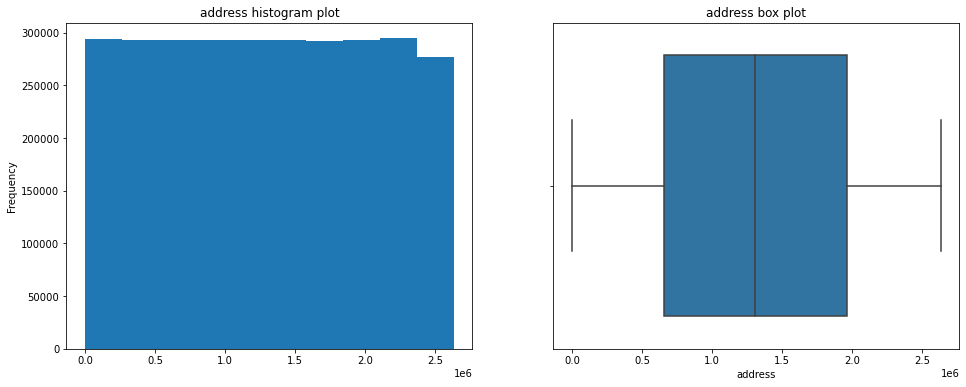

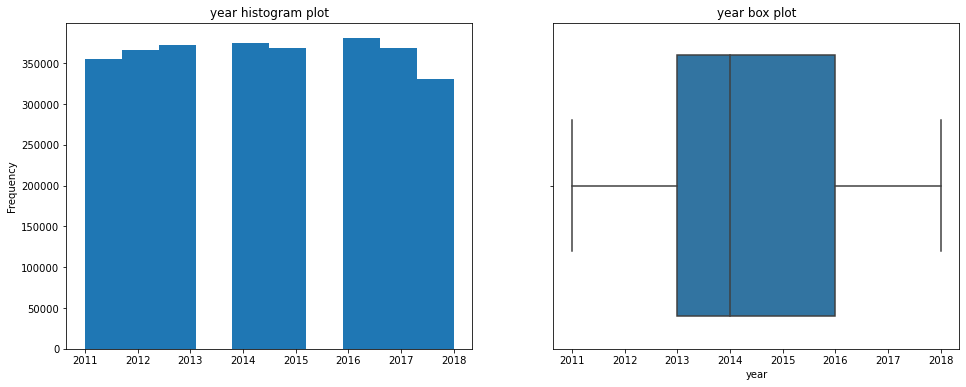

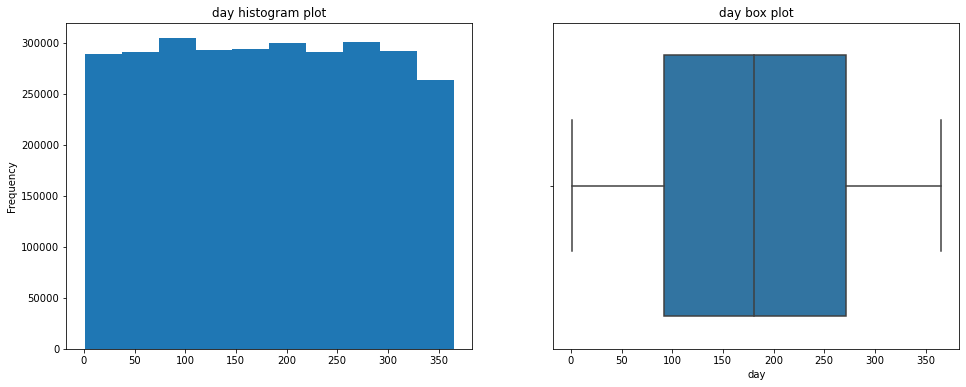

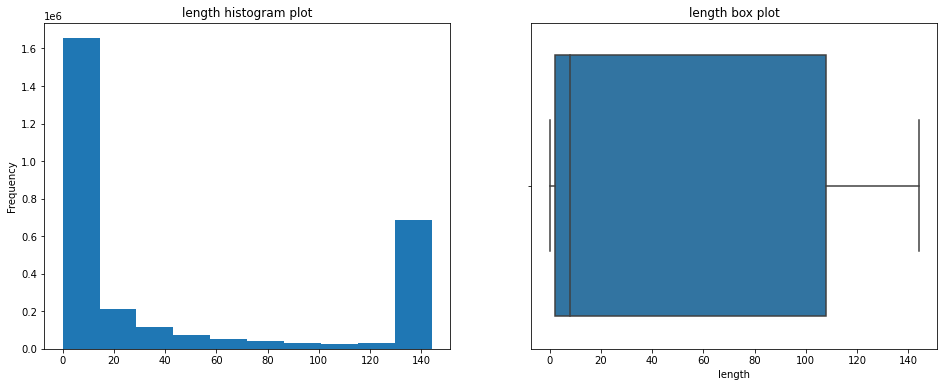

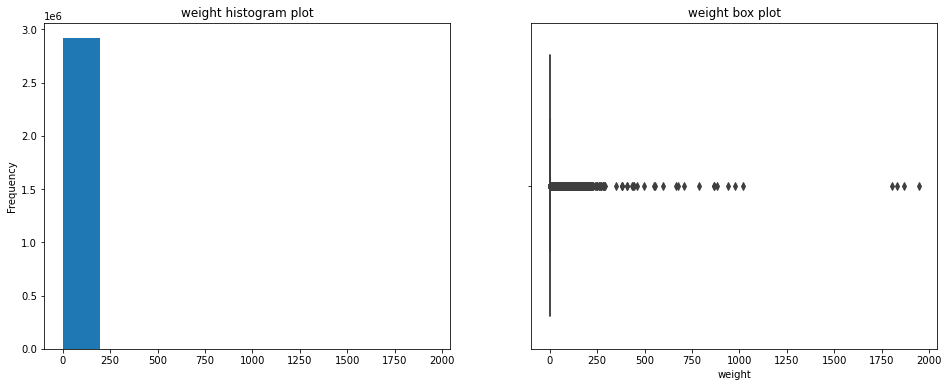

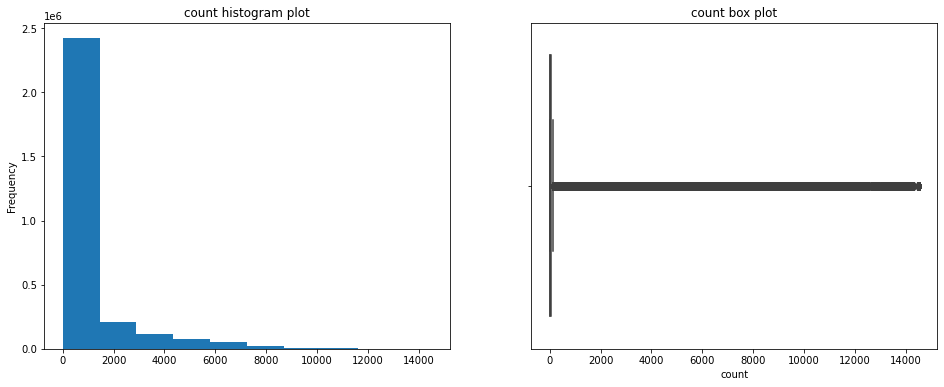

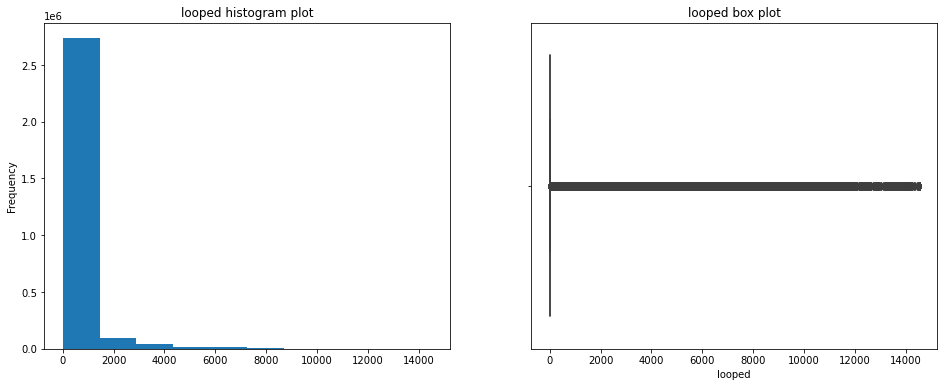

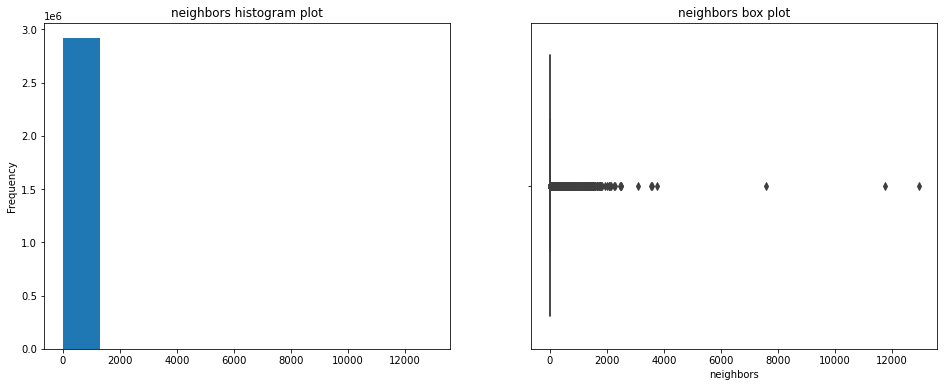

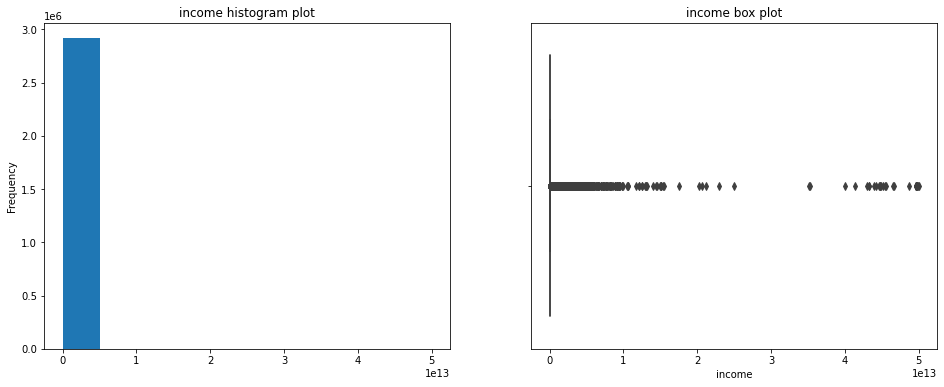

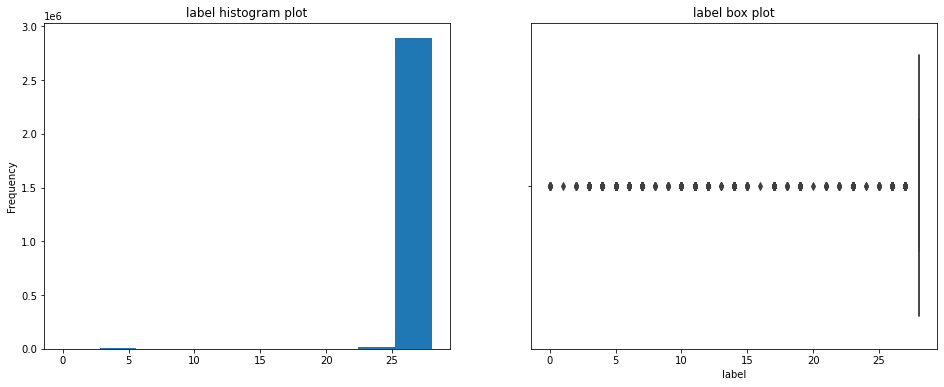

In [5]:
#Visualization
#Hisograms and Boxplots

for i in df.columns:
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    df[i].plot(kind = 'hist')
    plt.title(f'{i} histogram plot')
    plt.subplot(1, 2, 2)
    sns.boxplot(df[i])
    plt.title(f'{i} box plot')
    plt.savefig(f'{i}histBox.png')

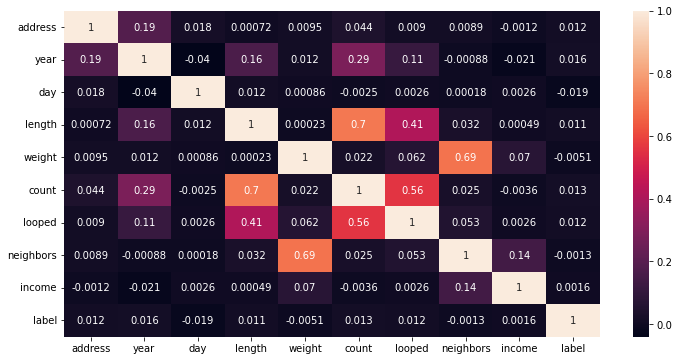

In [6]:
# Correlation matrix

plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), annot = True)
plt.savefig('corrHeatMap.png')

In [7]:
X=df.drop('label',axis=1)
y=df['label']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [9]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtc.fit(X_train,y_train)
# print('Decision Tree Classification Report:\n', classification_report(y_test, dtc.predict(X_test)))
print('Decision Tree Confusion matrix:\n', confusion_matrix(y_test,dtc.predict(X_test)))

/Users/sushantkhanal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sushantkhanal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sushantkhanal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00       617
           4       0.00      0.00      0.00      2317
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        63
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        13
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00        12
          14       0.00      0.00      0.00       111
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00        14
          18       0.00      0.00      0.00

In [10]:
rf=RandomForestClassifier(max_depth=3,random_state=0)
rf=rf.fit(X_train,y_train)
print('Random Forest Classification Report:\n', classification_report(y_test, rf.predict(X_test)))
print('Random Forest Confusion matrix:\n', confusion_matrix(y_test,rf.predict(X_test)))

/Users/sushantkhanal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sushantkhanal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sushantkhanal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00       617
           4       0.00      0.00      0.00      2317
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        63
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        13
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00        12
          14       0.00      0.00      0.00       111
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00        14
          18       0.00      0.00      0.00